# Import Packages

In [1]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras import datasets, layers, models
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np

2023-02-10 14:20:44.875913: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-10 14:20:46.043413: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/jude/anaconda3/envs/nn/lib/python3.10/site-packages/tensorrt/
2023-02-10 14:20:46.046096: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/jude/anaconda3/envs/nn/lib/python3.10/site-packages/te

# Import dataset

In [2]:
(train_images1, train_labels1), (test_images1, test_labels1) = datasets.cifar10.load_data() # Load dataset
train_images = train_images1[0:25000]
test_images = test_images1[0:5000]
train_labels = train_labels1[0:25000]
test_labels = test_labels1[0:5000]
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(25000, 32, 32, 3)
(25000, 1)
(5000, 32, 32, 3)
(5000, 1)


# Create the class identifiers and plot an example

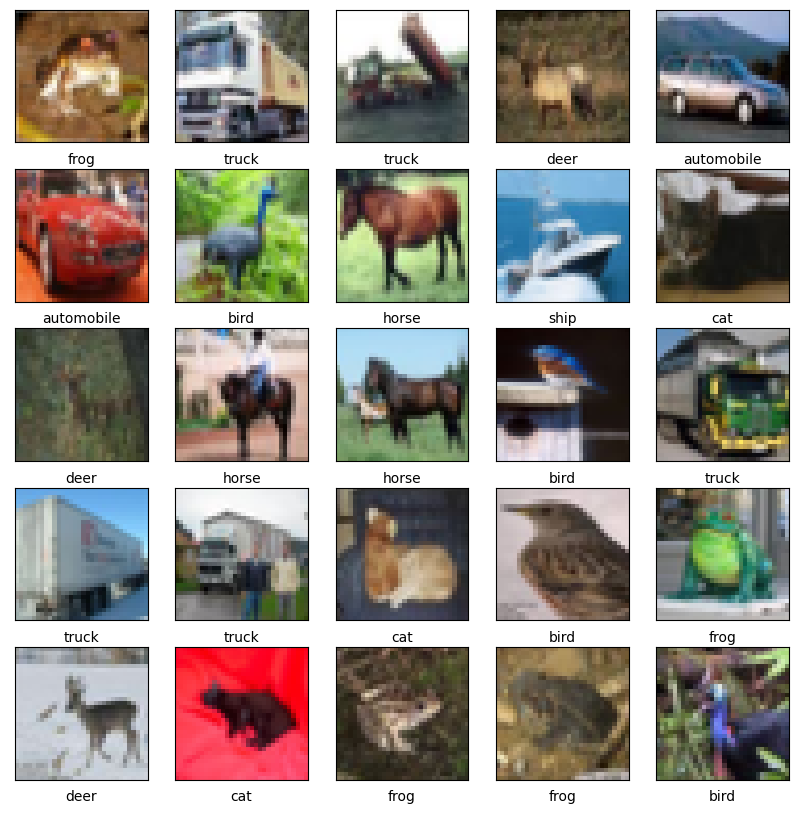

In [3]:
# Creating a list of all the class labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
# Visualizing some of the images from the training dataset
plt.figure(figsize=[10,10])
for i in range (25):    
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i][0]])
plt.show()

# Convert Images into float type

In [4]:
# Converting the pixels data to float type
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
 
# Scaling (255 is the total number of pixels an image can have)
train_images = train_images / 255
test_images = test_images / 255 

# One-hot encoding the target class (labels)
num_classes = 10
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

# Build the CNN and add its layers

In [7]:
# Creating a Convolutional Neural Network (CNN)
model = Sequential()

# block 1
model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

# block 2
model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

# block 3
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))    # num_classes = 10

# Checking the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                  

# Train the Neural Network

In [8]:
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy']) # Compiling
print("\nTraining starts")
history = model.fit(train_images, train_labels, batch_size=64, epochs=25,
                    validation_split = 0.2)    # Training
print("Training ends")

print("\nTesting starts")
scores=model.evaluate(test_images,test_labels)             # Testing
print("Testing ends\n")
print("Testing Accuracy: ", scores[1])


Training starts
Epoch 1/25


2023-02-10 14:21:30.090795: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8204
2023-02-10 14:21:32.071931: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7fd72a1837e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-02-10 14:21:32.071970: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce GTX 1650 Ti, Compute Capability 7.5
2023-02-10 14:21:32.083640: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-02-10 14:21:32.246209: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


313/313 [==============================] - 10s 14ms/step - loss: 1.6561 - accuracy: 0.3948 - val_loss: 1.3374 - val_accuracy: 0.5164
Epoch 2/25
313/313 [==============================] - 4s 12ms/step - loss: 1.2254 - accuracy: 0.5613 - val_loss: 1.0924 - val_accuracy: 0.6118
Epoch 3/25
313/313 [==============================] - 4s 13ms/step - loss: 1.0156 - accuracy: 0.6408 - val_loss: 1.0287 - val_accuracy: 0.6396
Epoch 4/25
313/313 [==============================] - 4s 13ms/step - loss: 0.8573 - accuracy: 0.7003 - val_loss: 0.9500 - val_accuracy: 0.6734
Epoch 5/25
313/313 [==============================] - 4s 13ms/step - loss: 0.7447 - accuracy: 0.7378 - val_loss: 0.9259 - val_accuracy: 0.6770
Epoch 6/25
313/313 [==============================] - 4s 13ms/step - loss: 0.6243 - accuracy: 0.7803 - val_loss: 0.9214 - val_accuracy: 0.6882
Epoch 7/25
313/313 [==============================] - 4s 14ms/step - loss: 0.5060 - accuracy: 0.8212 - val_loss: 1.0066 - val_accuracy: 0.6862
Epoch 8/2

Text(0.5, 1.0, 'Loss Curves')

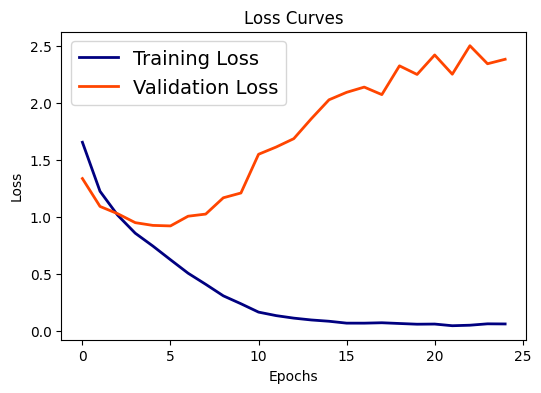

In [9]:
# Loss curve
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'navy', linewidth=2.0)
plt.plot(history.history['val_loss'], 'orangered', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

Text(0.5, 1.0, 'Accuracy Curves')

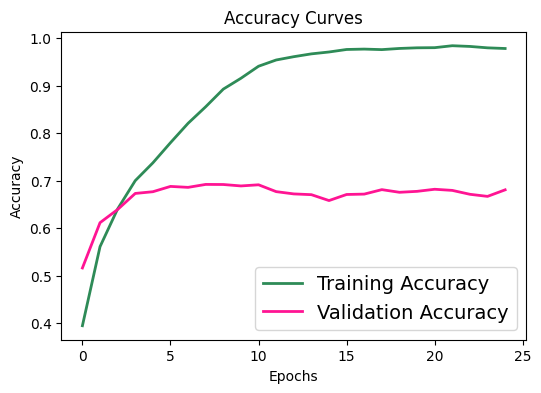

In [10]:
# Accuracy curve
plt.figure(figsize=[6,4])
plt.plot(history.history['accuracy'], 'seagreen', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'deeppink', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

157/157 [==============================] - 0s 2ms/step


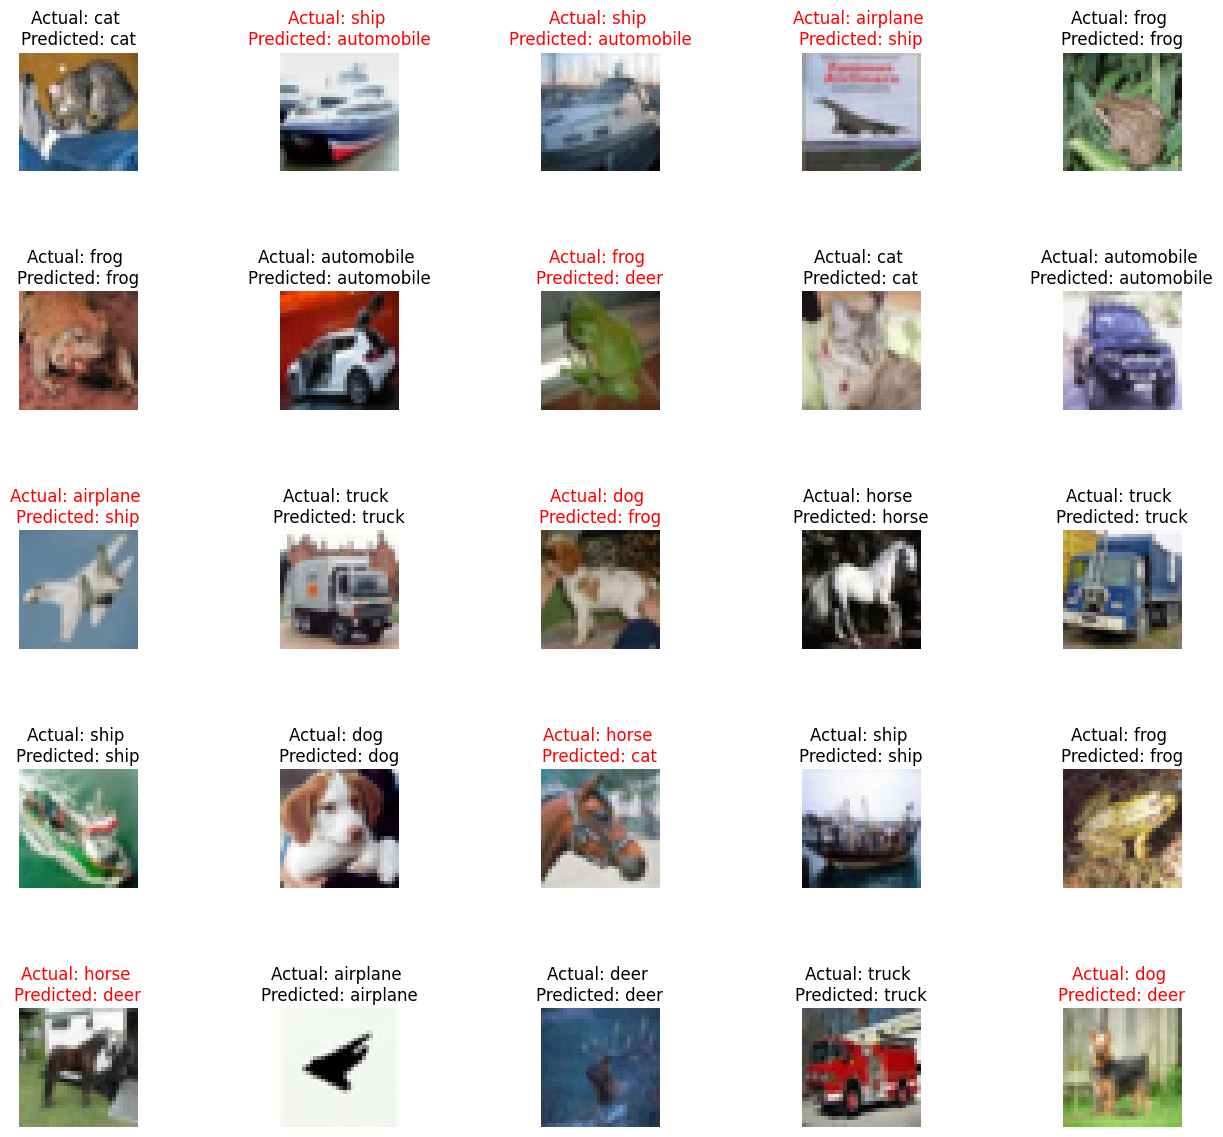

In [11]:
# Making the Predictions
pred = model.predict(test_images)
pred_classes = np.argmax(pred, axis=1)
#print(pred)
#print(pred_classes)

# Plotting the Actual vs. Predicted results
fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0, 25):
    axes[i].imshow(test_images[i])
    if class_names[np.argmax(test_labels[i])]==class_names[pred_classes[i]]:
     axes[i].set_title("Actual: %s \nPredicted: %s" % (class_names[np.argmax(test_labels[i])], class_names[pred_classes[i]]))
    else:
     axes[i].set_title("Actual: %s \nPredicted: %s" % (class_names[np.argmax(test_labels[i])], class_names[pred_classes[i]]), color='red')
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1.2)